In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import config
from utils.io import load_pickle
from utils.torch.datasets import PathologicalImagesDataset, PathologicalImagesDatasetMode

# Load dataset

In [5]:
mode = PathologicalImagesDatasetMode.Val
base_dir = config.DATASET_TRAIN_DIR

In [6]:
dataset = PathologicalImagesDataset(base_dir, mode=mode)

In [7]:
images = [dataset[i][0] for i in range(len(dataset))]
masks = [dataset[i][1] for i in range(len(dataset))]

In [8]:
images = np.stack(images)
masks = np.stack(masks)

In [9]:
images.shape, masks.shape

((34, 500, 500, 3), (34, 500, 500))

# Load predictions 

In [42]:
images_filename, predictions_480 = load_pickle(config.PREDICTIONS_DIR.joinpath(f'FCN32_224_480_val.pkl'))
_, predictions_224 = load_pickle(config.PREDICTIONS_DIR.joinpath(f'FCN32_224_224_val.pkl'))

In [43]:
predictions_480.shape, predictions_224.shape

((34, 500, 500), (34, 500, 500))

In [36]:
predictions_mask_480 = np.zeros_like(predictions_480)
predictions_mask_480[predictions_480>0.5] = 1

predictions_mask_224 = np.zeros_like(predictions_224)
predictions_mask_224[predictions_224>0.5] = 1

# Plot predictions

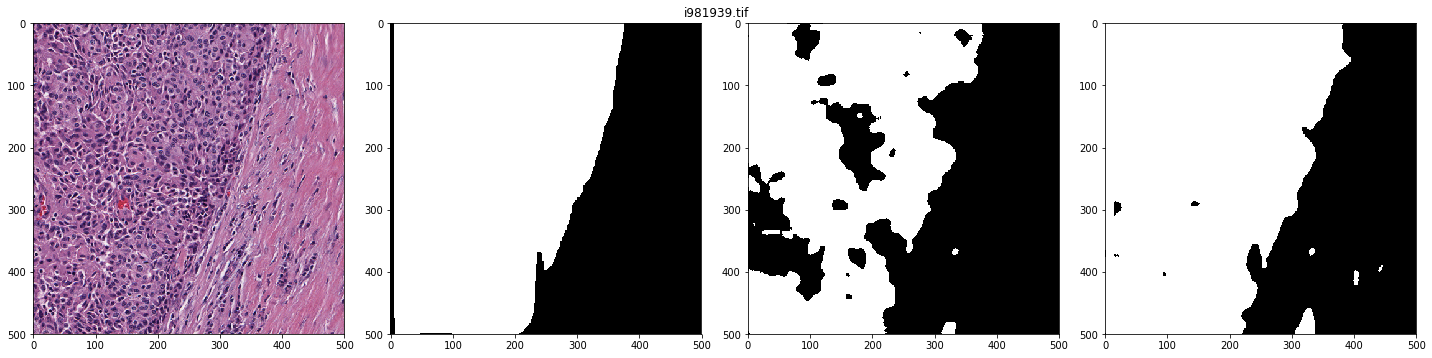

In [52]:
i = 6

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
ax1.imshow(images[i])
ax2.imshow(masks[i], cmap='gray')
ax3.imshow(predictions_mask_480[i], cmap='gray')
ax4.imshow(predictions_mask_224[i], cmap='gray')

fig.suptitle(images_filename[i].name)

fig.tight_layout()